In [476]:
import pickle
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [661]:
with open('hob_regret_notime_stag.pkl','rb') as f:
    hob = pickle.load(f) 

FileNotFoundError: [Errno 2] No such file or directory: 'hob_regret_notime_stag.pkl'

In [743]:
with open('../../Downloads/regret_None818twoshortmajstagg12.pkl','rb') as f:
    t = pickle.load(f)

In [749]:
with open('regret_personalized_None818twotimesaveshortmajoritysmallstaglong_cond.pkl','rb') as f:
    personalized = pickle.load(f) 

In [748]:
with open('regret_batch_None818twotimesaveshortmajoritysmallstaglong_cond.pkl','rb') as f:
    batch = pickle.load(f) 

In [438]:
def merge(p):
    to_return={}
    for time,dicts in p.items():
        for person,sims in dicts.items():
            if person not in to_return:
                to_return[person]={}
            for sim,r in sims.items():
                if sim not in to_return[person]:
                    to_return[person][sim]=[]
                to_return[person][sim].append(r)
                
    for person in to_return:
        for sim in to_return[person]:
            to_return[person][sim]=sum(to_return[person][sim])
    #to_return[person][sim]=sum(to_return[person][sim])
    return to_return

In [741]:
nprob = merge(pooled)

In [622]:
case = 'case_three'
nprob = merge(t[case]['or'])
nper = merge(personalized[case]['or'])
nbat = merge(batch[case]['or'])
nhob = merge(hob[case]['or'])

In [742]:
nprob

{0: {0: 17.8,
  1: 18.750000000000007,
  2: 14.100000000000005,
  3: 18.500000000000004,
  4: 15.999999999999996,
  5: 16.5,
  6: 13.7,
  7: 16.15,
  8: 14.900000000000006,
  9: 15.600000000000005,
  10: 14.200000000000003,
  11: 12.500000000000002,
  12: 15.149999999999999,
  13: 12.700000000000003,
  14: 18.800000000000004,
  15: 13.700000000000006,
  16: 14.850000000000005,
  17: 14.299999999999999,
  18: 15.449999999999998,
  19: 17.650000000000006,
  20: 12.900000000000002,
  21: 13.400000000000002,
  22: 13.250000000000002,
  23: 20.55,
  24: 14.600000000000003,
  25: 18.100000000000005,
  26: 13.35,
  27: 12.850000000000003,
  28: 20.550000000000008,
  29: 14.15,
  30: 19.350000000000005,
  31: 16.4,
  32: 18.050000000000004,
  33: 13.650000000000007,
  34: 14.049999999999999,
  35: 14.250000000000005,
  36: 19.1,
  37: 13.800000000000004,
  38: 14.450000000000005,
  39: 16.000000000000004,
  40: 14.200000000000005,
  41: 14.549999999999999,
  42: 20.900000000000006,
  43: 20.10

In [525]:
nprob = merge(t[case]['or'])

In [517]:
nper = merge(personalized[case]['or'])

In [518]:
nbat = merge(batch[case]['or'])

In [519]:
nhob = merge(hob[case]['or'])

In [505]:
def test_idea(pooled):
    
    to_return = {}
    for time,pooled_time in pooled.items():
        temp = {}
        for person in range(32):
            new_dict = {}
            for i in range(50):
                if person in pooled_time:
                    if i in pooled_time[person]:
                        new_dict[i]=pooled_time[person][i]
                        new_dict[i+50]=0
                        new_dict[i+100]=0
                temp[person]=new_dict
        to_return[time]=temp
    return to_return

In [392]:
pooled[pd.Timestamp('2015-07-27 10:00:00')].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 18, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31])

In [349]:
test = test_idea(pooled)

In [368]:
#d =pooled[pd.Timestamp('2015-10-16 19:00:00')]
#alls = []
#for k,v in d.items():
    #print(k)
    #print(v)
    #
    #mymean = np.array(list(v.values())).mean()
    #print(mymean)
    #print(sum([(r-mymean)**2 for r in list(v.values())]))
    #alls.extend(list(v.values()))

In [149]:
np.array(all_averages).std()

0.06722235984600143

In [187]:
 np.array([np.array(list(pooled[pd.Timestamp('2015-08-27 10:00:00')][i].values())).std() for i in pooled[pd.Timestamp('2015-08-27 10:00:00')].keys()]).mean()

0.05249286458231495

In [27]:
with open('../distributions_rl4rl/time_to_active_participants_pop_32_short_staggered_12.pkl','rb') as f:
    act = pickle.load(f)

In [307]:
def get_ssw_one_time(a_dict):
    
    temp = []
    for person,sim in a_dict.items():
        #print(sim)
        #print(sim.keys())
        #print(list(sim.values()))
        my_average = np.array(list(sim.values())).mean()
        
        t = [(r-my_average)**2 for r in list([abs(r) for r in sim.values()])]
        temp.append(sum(t))
    #print(temp)        
    return sum(temp)
    

In [667]:
def get_ssb_one_time(a_dict):
    
    alls = []
    
    for person,sim in a_dict.items():
        t = [abs(r) for r in list(sim.values())]
        alls.extend(t)
    global_mean = np.array(alls).mean()
    temp = []
    for person,sim in a_dict.items():
        
        my_average = np.array(list([abs(r) for r in sim.values()])).mean()
        temp.append(50*((my_average-global_mean)**2))
        
    return sum(temp)
        
        

In [458]:
def get_sst_one_time(a_dict):
    
    alls = []
    
    for person,sim in a_dict.items():
        #t = [r for r in list(sim.values())]
        alls.extend(sim.values())
    global_mean = np.array(alls).mean()
    temp = []
    for person,sim in a_dict.items():
        
        my_average = [(r-global_mean)**2 for r in list([abs(r) for r in sim.values()])]
        temp.append(sum(my_average))
    return sum(temp)
        

In [510]:
def print_info(d):
    ssw = get_ssw_one_time(d)

    ssb =  get_ssb_one_time(d)
    sst =  get_sst_one_time(d)
    print(ssw+ssb)
    print(sst)
    print(ssw)
    print(ssb)
    print(ssw/sst)

In [760]:
case = 'case_one'
nprob = merge(t[case]['or'])
nper = merge(personalized[case]['or'])
nbat = merge(batch[case]['or'])
nhob = merge(hob[case]['or'])

In [761]:
print_info(nbat)

16275.665298437474
16275.665298437474
10142.271249999982
6133.3940484374925
0.623155555488947


In [762]:
print_info(nhob)

44870.62897499984
44870.62897499987
42130.30629999985
2740.3226749999885
0.9389283649995899


In [763]:
print_info(nper)

52806.41937499981
52806.41937499981
48593.61899999983
4212.80037499998
0.9202218134677307


In [764]:
print_info(nprob)

14757.741210937455
14757.741210937456
12240.486349999963
2517.254860937492
0.829428174342028


In [247]:
pooled[pd.Timestamp('2015-10-15 19:00:00')].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31])

In [573]:
def adjust_dict(d):
    
    indices = list(sorted(d.keys()))
    return {i:d[indices[i]] for i in range(len(indices))}

In [605]:
def to_days(a_dict):
    to_return = {}
    
    for k,v in a_dict.items():
        if k.date() not in to_return:
            to_return[k.date()]={}
        for sim,r in v.items():
            if sim not in to_return[k.date()]:
                to_return[k.date()][sim]=[]
            to_return[k.date()][sim].append(r)
            
    for k,v in to_return.items():
        for sim,ar in v.items():
            to_return[k][sim]=np.array(ar).sum()
    return to_return
    

In [594]:
def break_out_to_person_again(d):
    to_return = {}
    for time,people in d.items():
        for person,pdict in people.items():
            if person not in to_return:
                to_return[person]={}
            to_return[person][time]=pdict
    
    r = {}
    for person,timedict in to_return.items():
        newd = to_days(timedict)
        newd = adjust_dict(newd)
        for k,v in newd.items():
            if k not in r:
                r[k]={}
            r[k][person]=v
    return r
    

In [310]:
def get_all(d):
    times_ssw = {}
    times_ssb = {}
    times_sst = {}
    for time in d.keys():
        times_ssw[time]=get_ssw_one_time(d[time])
        times_ssb[time]=get_ssb_one_time(d[time])
        times_sst[time]=get_sst_one_time(d[time])
    return times_ssw,times_ssb,times_sst

In [311]:
def get_weekly_averages(points):
    to_return = []
    for i in range(0,len(points),35):
        temp = points[i:i+35]
        to_return.append(np.array(temp).mean())
    return to_return

In [624]:
r  = break_out_to_person_again(t['case_three']['or'])

In [625]:
sswall,ssball,sstall = get_all(r)

In [597]:
to_plot = [sswall[t]/(sstall[t]) for t in sorted(sstall.keys())]

In [637]:
ts2 = get_weekly_averages(to_plot)

In [626]:
sum(list(ssball.values()))

8653.508201508017

In [627]:
sum(list(sswall.values()))

19947.87022344007

In [647]:
sorted(t['case_three']['or'].keys())

[Timestamp('2015-07-27 10:00:00'),
 Timestamp('2015-07-27 13:00:00'),
 Timestamp('2015-07-27 15:00:00'),
 Timestamp('2015-07-27 17:00:00'),
 Timestamp('2015-07-27 19:00:00'),
 Timestamp('2015-07-28 10:00:00'),
 Timestamp('2015-07-28 13:00:00'),
 Timestamp('2015-07-28 15:00:00'),
 Timestamp('2015-07-28 17:00:00'),
 Timestamp('2015-07-28 19:00:00'),
 Timestamp('2015-07-29 10:00:00'),
 Timestamp('2015-07-29 13:00:00'),
 Timestamp('2015-07-29 15:00:00'),
 Timestamp('2015-07-29 17:00:00'),
 Timestamp('2015-07-29 19:00:00'),
 Timestamp('2015-07-30 10:00:00'),
 Timestamp('2015-07-30 13:00:00'),
 Timestamp('2015-07-30 15:00:00'),
 Timestamp('2015-07-30 17:00:00'),
 Timestamp('2015-07-30 19:00:00'),
 Timestamp('2015-07-31 10:00:00'),
 Timestamp('2015-07-31 13:00:00'),
 Timestamp('2015-07-31 15:00:00'),
 Timestamp('2015-07-31 17:00:00'),
 Timestamp('2015-07-31 19:00:00'),
 Timestamp('2015-08-01 10:00:00'),
 Timestamp('2015-08-01 13:00:00'),
 Timestamp('2015-08-01 15:00:00'),
 Timestamp('2015-08-

In [671]:
get_ssw_one_time(t['case_three']['r'][pd.Timestamp('2015-10-17 19:00:00')])

77.44604653752242

In [672]:
get_ssb_one_time(t['case_three']['r'][pd.Timestamp('2015-10-17 19:00:00')])

7.409410373215893

In [677]:
np.array(list(t['case_three']['or'][pd.Timestamp('2015-10-18 19:00:00')][10].values())).mean()

0.09989773132617281

In [700]:
def double_check(d):
    to_return = []
    for person,sim_dict in d.items():
        print(person)
        regrets = list(sim_dict.values())
        avgreg = np.array(regrets).mean()
        var = [(r+1-avgreg)**2 for r in regrets]
        print(sum(var))
        to_return.append(sum(var))
    return sum(to_return)

In [709]:
def double_checkt(d):
    to_return = []
    for person,sim_dict in d.items():
        print(person)
        regrets = list([r+1 for r in sim_dict.values()])
        avgreg = np.array(regrets).mean()
        var = [(r-avgreg)**2 for r in regrets]
        print(sum(var))
        to_return.append(sum(var))
    glb = np.array(to_return).mean()
    to_return = []
    for person,sim_dict in d.items():
        print(person)
        regrets = list(sim_dict.values())
        avgreg = np.array([r+1 for r in regrets]).mean()
        var =(avgreg-glb )**2 
        #print(sum(var))
        to_return.append(50*(var))
    return sum(to_return)

In [705]:
#t['case_one']['or'][pd.Timestamp('2015-10-18 19:00:00')][2]

In [710]:
double_checkt(t['case_three']['or'][pd.Timestamp('2015-10-18 19:00:00')])

0
0.25611162038382823
2
0.0470790021345909
4
4.8849611152840176
5
8.346013437740169
6
3.371609130454612
8
1.055877526379124
9
15.772693092404158
10
0.6890646309508813
11
0.8870611351450814
12
6.016796773191517
13
0.4241300393637474
16
5.831131143013721
17
0.00018993150334210645
18
0.18047075722334788
19
0.18164659760775115
22
0.9304211528677753
23
0.0033731760580158867
26
1.4412712368155987
27
5.1407323800219835
28
0.17786215074541117
30
4.158783742663251
31
1.9148728854127977
0
2
4
5
6
8
9
10
11
12
13
16
17
18
19
22
23
26
27
28
30
31


3174.0192108564697

In [697]:
double_check(t['case_three']['or'][pd.Timestamp('2015-10-18 19:00:00')])

0
50.25611162038378
2
50.04707900213462
4
54.884961115283964
5
58.34601343774012
6
53.3716091304546
8
51.05587752637907
9
65.7726930924042
10
50.689064630950924
11
50.88706113514504
12
56.016796773191516
13
50.424130039363746
16
55.831131143013664
17
50.00018993150334
18
50.18047075722331
19
50.18164659760774
22
50.93042115286774
23
50.003373176058034
26
51.44127123681556
27
55.14073238002204
28
50.17786215074541
30
54.15878374266325
31
51.91487288541277


1161.7121526573642

In [ ]:
58558.579757366184
392534.51759958593

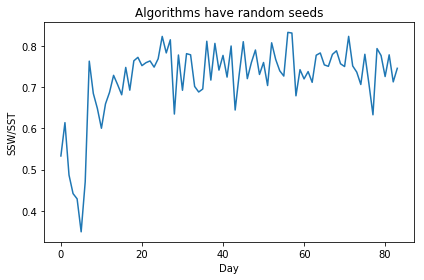

In [638]:
#sswall,ssball,sstall = get_all(personalized)
to_plot = [sswall[t]/(sstall[t]) for t in sorted(sstall.keys())]
ts2 = get_weekly_averages(to_plot)
plt.plot(to_plot)
plt.ylabel('SSW/SST')
plt.xlabel('Day')
plt.title('Algorithms have random seeds')
plt.tight_layout()
#plt.savefig('between study variance (SSG) over total measure of variability (SST) algorithm random seeds')


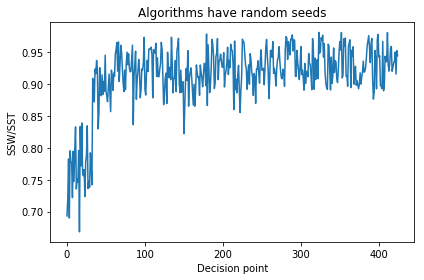

In [380]:
sswall,ssball,sstall = get_all(pooled)
to_plot = [sswall[t]/(sstall[t]) for t in sorted(sstall.keys())]
ts2 = get_weekly_averages(to_plot)
plt.plot(to_plot)
plt.ylabel('SSW/SST')
plt.xlabel('Decision point')
plt.title('Algorithms have random seeds')
plt.tight_layout()
#plt.savefig('between study variance (SSG) over total measure of variability (SST) algorithm random seeds')
